<a href="https://colab.research.google.com/github/gohibi/pythonbases/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
#data manipulation
import pandas as pd
import numpy as np
#data visualisation
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
#machine learning algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
#Model selection and evaluation
from sklearn.model_selection import train_test_split
#perfomance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score



#Загрузите набор данных

In [171]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [172]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
%cd /content/drive

/content/drive


Прогнозирование продаж - это процесс прогнозирования будущих продаж. Это важная часть финансового планирования бизнеса, и точное прогнозирование позволяет избежать переоценки или недооценки будущих продаж, что может привести к большим убыткам для бизнеса. Статистика прошлых и текущих продаж используется для оценки будущих результатов. Но с точностью до традиционных прогнозов сложно угнаться за точностью прогнозов продаж. С этой целью были открыты различные методы машинного обучения. В этой работе мы взяли набор данных из магазина видеоигр и провели подробный анализ набора данных. Здесь мы реализовали разные методы машинного обучения с разными показателями.

In [174]:
sales= pd.read_csv("/content/drive/MyDrive/2021/CSV/salesgames.csv")
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#Очистите данные!

Drop rows of NAN

In [175]:
nan_df = sales[sales.isna().any(axis=1)]
display(nan_df.head())


sales = sales.dropna(how='all')
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Первое, что мы можем попробовать сделать, - это проверить, сколько глобальных продаж игр происходит в год. Мы можем посчитать, сколько лет находится в базе данных, а затем построить график сравнения этих лет с глобальными продажами.

Text(0.5, 1.0, 'Game Releases Per Year')

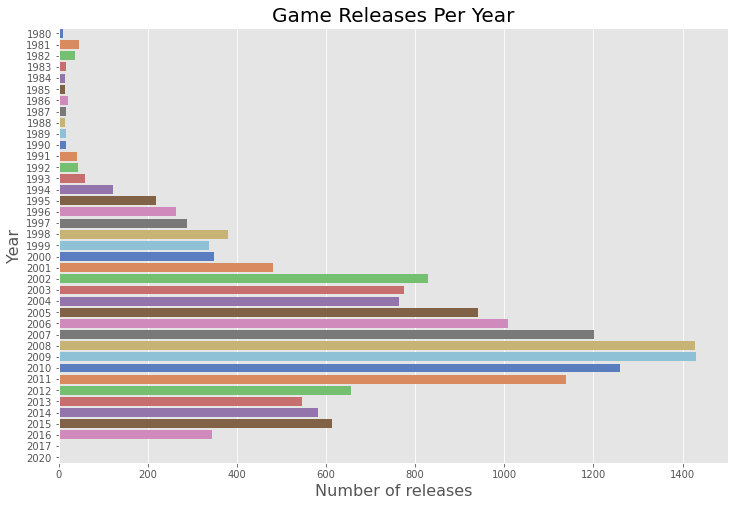

In [176]:
x = sales.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x,orient='h',palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None
               Rank          Year  ...   Other_Sales  Global_Sales
count  16598.000000  16327.000000  ...  16598.000000  16598.000000
mean    8300.605254   2006.406443  ...      0.048063      0.537441
std     4791.853933      5.828981  ...      0.188588      1.5550

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


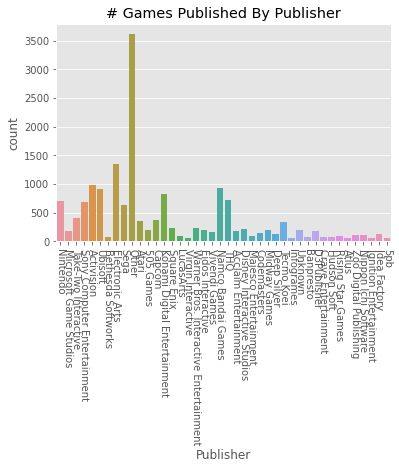

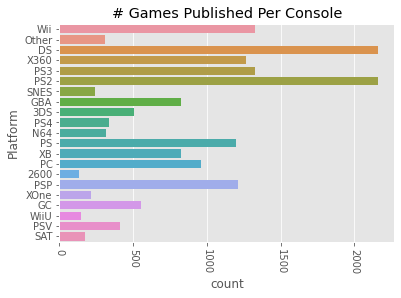

In [177]:
print(sales.info())
print(sales.describe())

# let's choose a cutoff and drop any publishers that have published less than X games

for i in sales['Publisher'].unique():
    if sales['Publisher'][sales['Publisher'] == i].count() < 60:
        sales['Publisher'][sales['Publisher'] == i] = 'Other'
for i in sales['Platform'].unique():
    if sales['Platform'][sales['Platform'] == i].count() < 100:
        sales['Platform'][sales['Platform'] == i] = 'Other'
sns.countplot(x='Publisher', data=sales)
plt.title("# Games Published By Publisher")
plt.xticks(rotation=-90)
plt.show()

plat_data = sales['Platform'].value_counts(sort=False)
sns.countplot(y='Platform', data=sales)
plt.title("# Games Published Per Console")
plt.xticks(rotation=-90)
plt.show()

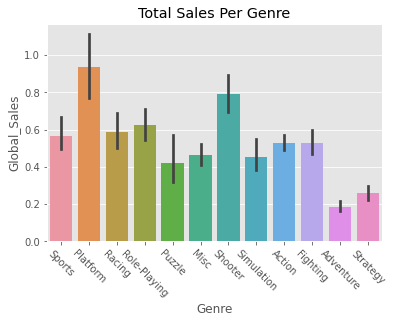

In [178]:
sns.barplot(x='Genre', y='Global_Sales', data=sales)
plt.title("Total Sales Per Genre")
plt.xticks(rotation=-45)
plt.show()

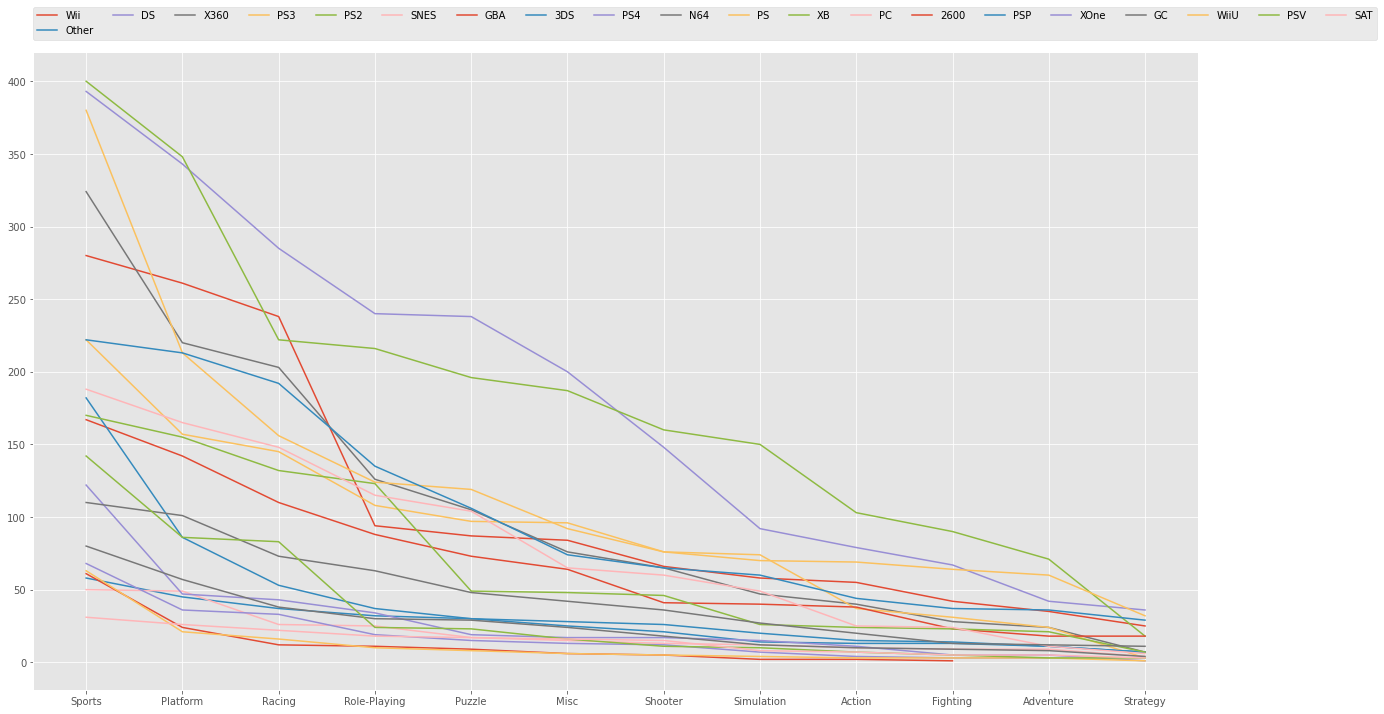

In [179]:
# try visualizing the number of games in a specific genre
for i in sales['Platform'].unique():
    sales['Genre'][sales['Platform'] == i].value_counts().plot(kind='line', label=i, figsize=(20, 10), grid=True)

# set the legend and ticks

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=20, borderaxespad=0.)
plt.xticks(np.arange(12), tuple(sales['Genre'].unique()))
plt.tight_layout()
plt.show()

In [180]:
def plot_discrete_attribute(data_frame, column):
    sns.boxplot(x=column, data=data_frame)

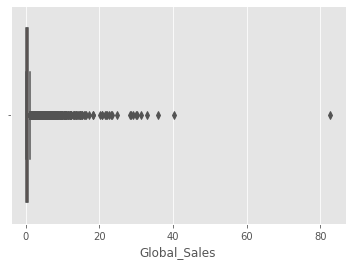

In [181]:
plot_discrete_attribute(sales,"Global_Sales") 

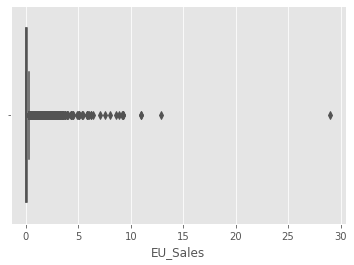

In [182]:
plot_discrete_attribute(sales,"EU_Sales")

Теперь, когда мы построили некоторые данные, давайте попробуем предсказать некоторые тенденции на основе этих данных. Мы можем сделать регрессию дерева решений, чтобы понять, чем могут закончиться показатели мировых продаж на основе показателей продаж в Европе. Сначала нам нужно разделить наши данные на наборы для обучения и тестирования. Мы начнем с определения продаж в Северной Америке как переменной X и глобальных продаж как переменной Y, а затем проведем разделение обучения / тестирования.

#Разделите набор данных на обучающий набор и тестовый набор

In [183]:
X = sales.iloc[:, 7].values
y = sales.iloc[:, 10].values

# train test split and split the dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [184]:
# reshape the data into long 2D arrays with 1 column and as many rows as necessary
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#Decision Tree regressor.

In [185]:
DTree_regressor = DecisionTreeRegressor(criterion ="squared_error", random_state=5)
DTree_regressor.fit(X_train, y_train)
y_pred = DTree_regressor.predict(X_train)
y_pred = y_pred.reshape(-1,1)

In [186]:
def plot_regression(classifier):

    plt.scatter(X_train, y_train,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Training set)')
    plt.xlabel('European Sales')
    plt.ylabel('Global Sales')
    plt.show()

    plt.scatter(X_test, y_test,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Testing set)')
    plt.xlabel('European  Sales')
    plt.ylabel('Global Sales')
    plt.show()

In [197]:
def calculation_evaluations(y: pd.Series, pre: np.ndarray) -> None:
  print('Mean Squared Error: {:.3f}'.format(mean_squared_error(y, pre)))
  print('Mean Absolute Error: {:.3f}'.format(mean_absolute_error(y, pre)))
  print('score: {:.3f}'.format(r2_score(y, pre)))
  print('Root Mean Squared Error : {:.3f}'.format(np.sqrt(mean_squared_error(y, pre))))
  print('Accuracy:',format(r2_score(y, pre)* 100,'.2f'),'%')
 

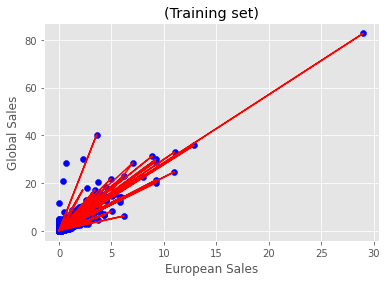

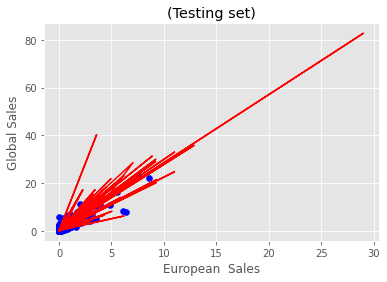

In [188]:
plot_regression(DTree_regressor)

In [198]:
calculation_evaluations(y_train, y_pred)

Mean Squared Error: 0.290
Mean Absolute Error: 0.219
score: 0.891
Root Mean Squared Error : 0.539
Accuracy: 89.13 %


In [196]:
print("Training set score: {:.2f}".format(DTree_regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(DTree_regressor.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.66
